# Importing Data 

Once the data is successfuly downloaded from [https://gea.esac.esa.int/archive/](https://gea.esac.esa.int/archive/), and correctly decompressed following the instroctions provided in [Neeed to add link to README from personal github](add-link), we can now import the data on Python and store it as a data frame using the package [pandas](https://pandas.pydata.org/).

Optional, add the following to the sql code to remove impurity in data:
```sql
WHERE gs.parallax < 5 * gs.parallax_error  -- Remove potential stars
AND gs.ruwe < 1.4  -- Ensure good astrometric quality
AND gs.phot_g_mean_mag < 21  -- Bright enough for good measurements
```

In [1]:
from src.data import data_download # Run Python file to download data

INFO: Query finished. [astroquery.utils.tap.core]


In [132]:
import pandas as pd
# Load into Pandas
df = pd.read_csv("csv_files/qso_full_data.csv")
print(df.head())  # Check the data

        source_id         ra       dec      pmra     pmdec  parallax  \
0   3470333738112  45.075505  0.152316 -1.072371 -3.191011  0.366321   
1   5944234902272  44.884761  0.164806 -0.121274  0.725026 -0.395659   
2   6459630980096  44.910498  0.189649  0.217806 -0.316007 -0.626561   
3   9517648372480  45.254655  0.228999 -0.552941 -1.895446 -0.917219   
4  10892037246720  45.188575  0.282424 -0.098037 -0.120580  0.001630   

   parallax_error      ruwe  phot_g_mean_mag  nu_eff_used_in_astrometry  \
0        0.901633  0.889714        20.571114                   1.526179   
1        1.340139  1.087911        20.704517                   1.647388   
2        0.548536  1.020956        20.173105                        NaN   
3        1.507964  1.031971        20.634562                        NaN   
4        0.246332  0.974657        18.787239                   1.565118   

   pmra_error  pmdec_error  pmra_pmdec_corr  astrometric_params_solved  
0    1.552507     1.226259         0.207769

### Column Content

Before we procede, we need to understand what each column contains, to do so let us print the heading of each column.

In [3]:
# Check column names
print(df.columns)

Index(['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax', 'parallax_error',
       'ruwe', 'phot_g_mean_mag', 'nu_eff_used_in_astrometry', 'pmra_error',
       'pmdec_error', 'pmra_pmdec_corr', 'astrometric_params_solved'],
      dtype='object')


The output above, displays:

1. <b>source_id</b>, Unique Gaia identifier for the object
2. <b>ra</b>, Right Ascension (celestial longitude) in degrees
3. <b>dec</b>, Declination (celestial latitude) in degrees
4. <b>pmra</b>, Proper motion in Right Ascension (mas/yr)
5. <b>pmdec</b>, Proper motion in Declination (mas/yr)
6. <b>parallax</b>, Parallax measurament (this is expected to be near zero for distant QSOs)
7. <b>ruwe</b>, Renormalised Unit Weight Error (this indicates the quality of the data point)
8. <b>phot_g_mean_mag</b>, Mean magnitude in Gaia's G-band 
9. <b>nu_eff_used_in_astrometry</b>, Efficient wavenumber denoted as $\nu_{eff}$, this is used to charecterise the color of a celestial object by describing how its light is distributed across different wavelenghts.
10. <b>parallax_error</b>, measure the uncentainty on parralax (standard deviation).
11. <b>pmra_error</b>, Uncertainty in pmra.
12. <b>pmdec_error</b>, Uncertainty in pmdec_error.

We want to make suere the data matches the description provided in the papaer, i.e. we expect there to be 1614173 sources which are identified as QSO-like objects. 

In [4]:
# Display the shape of the dataset
df.shape

(1614173, 14)

As expected, the above output confirms that there are 1614173 QSO-like objects in the dataset.

# Visualising Data

In this section we are going to reproduce some of the plots presented in the paper [Gaia Early Data Realease 3, Acceleration of the Solar System from Gaia astrometry](https://www.aanda.org/articles/aa/full_html/2021/05/aa39734-20/aa39734-20.html). 

<b>Efficient wavenumber $\nu_{eff}$</b> distribution visualisation:

Separating 5 parmater soultions and 6 parameter soultions

In [133]:
df_5param = df[df["astrometric_params_solved"]==31]
df_6param = df[df["astrometric_params_solved"]==95]

In [6]:
# Checking dimentisons
print(df_5param.shape)
print(df_6param.shape)

(1215942, 14)
(398231, 14)


As we can see from the above output, we have succesfully separated the data into 5 and 6 parameters solutions. In the paper it is reported that the 5 parameters solution dataset is of size 1215942, and 6 parameters solution data set of size 398231, which is what we observe from the above output.

Five-parameter solutions

In [1]:
import matplotlib.pyplot as plt
from src.data.data_utils import*

In [2]:
df_5param = load_qso_dataframe()
df_5param_filtered = load_filtered_qso_df()

In [3]:
# Collecting columns individually from dataset df
data_nu_eff = df_5param['nu_eff_used_in_astrometry'].dropna()
data_G = df_5param['phot_g_mean_mag'].dropna()
data_RUWE = df_5param['ruwe'].dropna()
data_RUWE_filtered = df_5param_filtered['ruwe'].dropna()

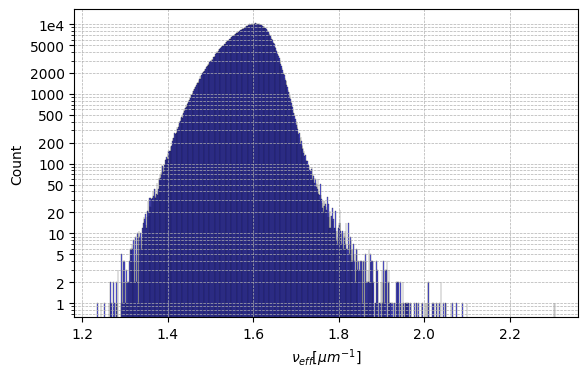

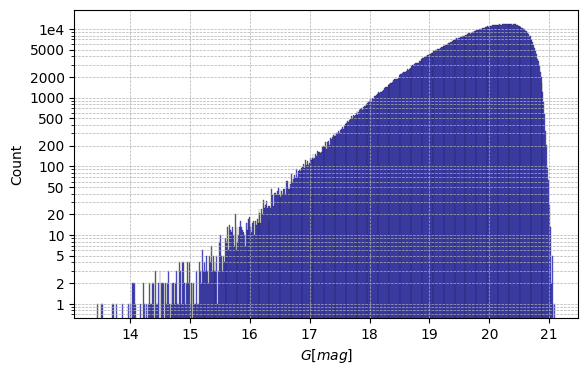

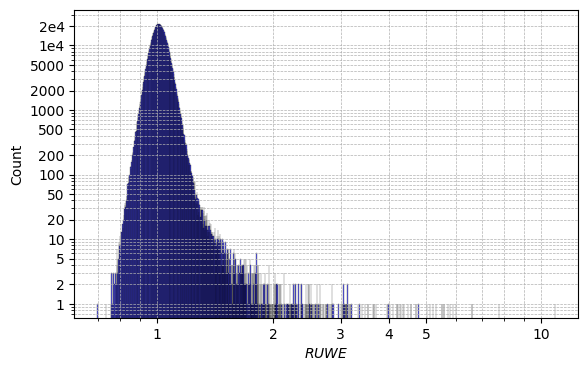

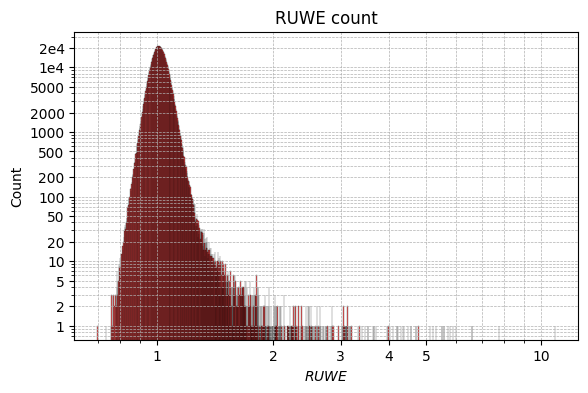

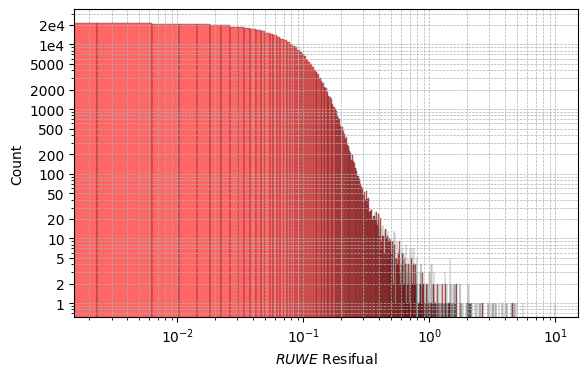

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import numpy as np

y = [1,2,5,10,20,50,100, 200, 500, 1000, 2000, 5000, 1e4]
label = [1,2,5,10,20,50,100, 200, 500, 1000, 2000, 5000, '1e4']
# Efficient wavenumber plot 
plt.figure(figsize=(6.5, 4))
plt.hist(data_nu_eff, bins=1000, density=False, alpha=0.6, histtype='bar', color='b', edgecolor='black', linewidth=0.3)
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.title('Efficient wavenumber count')
plt.xlabel(r'$\nu_{eff}[\mu m^{-1}]$')
plt.ylabel('Count')
plt.yticks(y, labels=label)
plt.savefig("plots/main_plots/eff_wavenumber_count.png", dpi=300, bbox_inches='tight')
plt.show()

# G-band magnitude plot
plt.figure(figsize=(6.5, 4))  
plt.hist(data_G, bins=500, density=False, alpha=0.6, histtype='bar', log=True, color='b', edgecolor='black', linewidth=0.3)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.title("Mean magnitude in Gaia's G-band count")
plt.xlabel(r'$G[mag]$')
plt.ylabel('Count')
plt.yticks(y, labels=label)
plt.savefig("plots/main_plots/Gband_count.png", dpi=300, bbox_inches='tight')
plt.show()


# RUWE plot
y = [1,2,5,10,20,50,100, 200, 500, 1000, 2000, 5000, 1e4, 2e4]
label = [1,2,5,10,20,50,100, 200, 500, 1000, 2000, 5000, '1e4', '2e4']
x = [1,2,3,4,5,10]
plt.figure(figsize=(6.5, 4))  
plt.hist(data_RUWE, bins=5000, density=False, alpha=0.6, histtype='bar', log=True, color='b', edgecolor='black', linewidth=0.3)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.title('RUWE count')
plt.xlabel(r'$RUWE$')
plt.ylabel('Count')
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0, 2.0, 5.0], numticks=100))
plt.xscale('log')
plt.xticks(x, labels=x)
plt.yticks(y, labels=label)
plt.savefig("plots/main_plots/ruwe_count.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(6.5, 4))  
plt.hist(data_RUWE_filtered, bins=5000, density=False, alpha=0.6, histtype='bar', log=True, color='red', edgecolor='black', linewidth=0.3)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('RUWE count')
plt.xlabel(r'$RUWE$')
plt.ylabel('Count')
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0, 2.0, 5.0], numticks=100))
plt.xscale('log')
plt.xticks(x, labels=x)
plt.yticks(y, labels=label)
plt.savefig("plots/main_plots/ruwe_count_filtered.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(6.5, 4))  
plt.hist(data_RUWE - data_RUWE_filtered, bins=5000, density=False, alpha=0.6, histtype='bar', log=True, color='red', edgecolor='black', linewidth=0.3)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.title('RUWE count')
plt.xlabel(r'$RUWE$ Resifual')
plt.ylabel('Count')
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0, 2.0, 5.0], numticks=100))
plt.xscale('log')
#plt.xticks(x, labels=x)
plt.yticks(y, labels=label)
plt.savefig("plots/main_plots/ruwe_count_residual.png", dpi=300, bbox_inches='tight')
plt.show()


Six-parameter solution

In [134]:
# Parrallax, mean and uncertainty
data_parallaxes = df_6param['parallax']
parallax_mean = df_6param['parallax'].mean()
parallax_std = df_6param['parallax'].std()
data_par_error = df_6param['parallax_error']

# Proper motion Right Ascension, mean and uncertainty
data_pmra = df_6param['pmra']
pmra_mean = df_6param['pmra'].mean()
pmra_std = df_6param['pmra'].std()
data_pmra_er = df_6param['pmra_error']

# Proper motion Declination, mean and uncertainty
data_pmdec = df_6param['pmdec']
pmdec_mean = df_6param['pmdec'].mean()
pmdec_std = df_6param['pmdec'].std()
data_pmdec_error = df_6param['pmdec_error']

Parallax, pmra \& pmdec normalised histogram plots

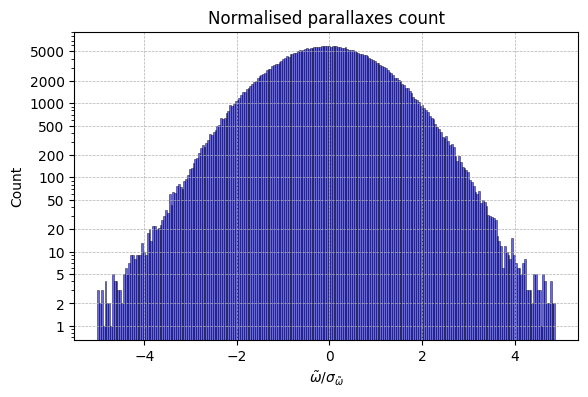

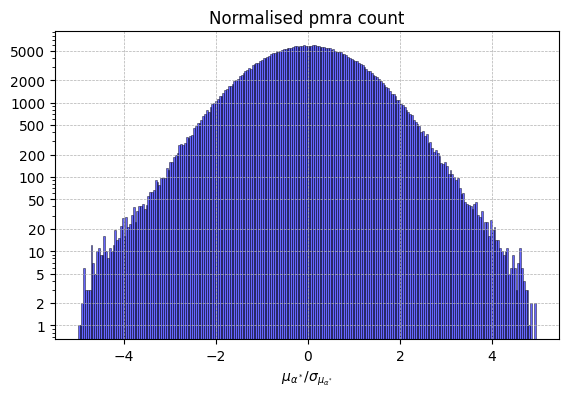

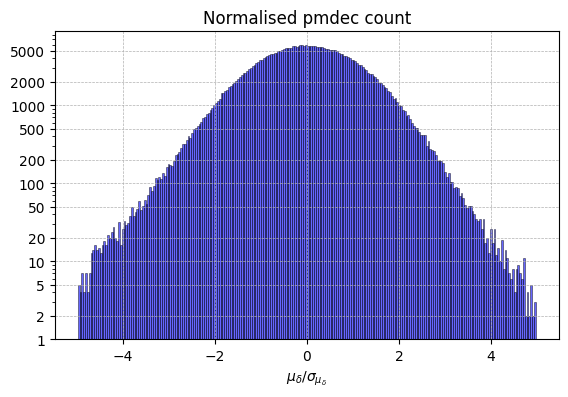

In [ ]:


data1 = (data_parallaxes)/data_par_error  
data2 = (data_pmra)/data_pmra_er
data3 = (data_pmdec)/data_pmdec_error

no_bins = 250


y = [1,2,5,10,20,50,100, 200, 500, 1000, 2000, 5000]

# Parallax
plt.figure(figsize=(6.5, 4))
plt.hist(data1, bins=no_bins, alpha=0.6, color='b', edgecolor='black', linewidth=0.5, log=True)
plt.title('Normalised parallaxes count')
plt.xlabel(r'$\tilde{\omega}/\sigma_{\tilde{\omega}}$')
plt.ylabel('Count')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0, 2.0, 5.0], numticks=100))
plt.yticks(y, labels=y)
#plt.savefig("plots/main_plots/Parralax.png", dpi=300, bbox_inches='tight')
plt.show()
# Pmra
plt.figure(figsize=(6.5, 4))
plt.hist(data2, bins=no_bins, alpha=0.6, color='b', edgecolor='black', linewidth=0.5, log=True)
plt.title('Normalised pmra count')
plt.xlabel(r'$\mu_{\alpha^*}/\sigma_{\mu_{\alpha^*}}$')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.yticks(y, labels=y)
#plt.savefig("plots/main_plots/pmra.png", dpi=300, bbox_inches='tight')
plt.show()
# Pmdec
plt.figure(figsize=(6.5, 4))
plt.hist(data3, bins=no_bins, alpha=0.6, color='b', edgecolor='black', linewidth=0.5, log=True)
plt.title('Normalised pmdec count')
plt.xlabel(r'$\mu_{\delta}/\sigma_{\mu_{\delta}}$')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.yticks(y, labels=y)
#plt.savefig("plots/main_plots/pmdec.png", dpi=300, bbox_inches='tight')
plt.show()


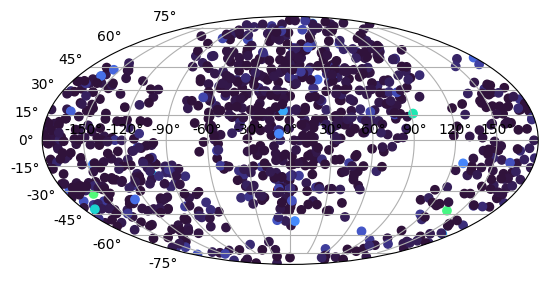

In [183]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.subplot(111, projection="mollweide")
plt.grid(True)

objects = np.random.choice(np.arange(len(df)), 1000, replace=False)

ra = df.ra.to_numpy()[objects] / 180 * np.pi - np.pi
dec = df.dec.to_numpy()[objects] / 180 * np.pi

weights = df.pmdec_error.to_numpy()[objects]**(-2) + df.pmra_error.to_numpy()[objects]**(-2)

plt.scatter(ra, dec, c=weights, cmap='turbo')

plt.show()

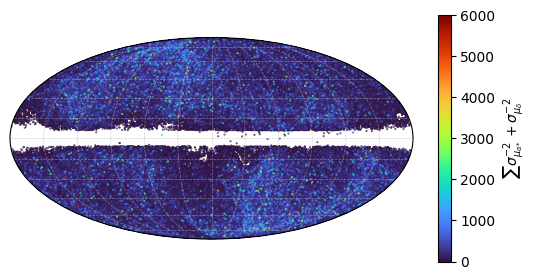

In [200]:
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from astropy.coordinates import SkyCoord
import astropy.units as u
import healpy as hp

pmra_error_5p = np.array(df_5param["pmra_error"])
pmdec_error_5p = np.array(df_5param["pmdec_error"])

st_weights = pmra_error_5p**(-2) + pmdec_error_5p**(-2) # compute statistical weights

nside = 64
coords = SkyCoord(ra=df_5param["ra"].values * u.deg,
                  dec=df_5param["dec"].values * u.deg,
                  frame='icrs')
gal = coords.galactic

l = gal.l
b = gal.b

weights = st_weights

mask = (weights >= 5) & (weights <= 6000)


# Apply mask
l_rad = l.radian[mask] - np.pi
b_rad = b.radian[mask]
w = weights[mask]

# Sort by weight ascending (so high values are last)
sorted_idx = np.argsort(w)
l_sorted = l_rad[sorted_idx]
b_sorted = b_rad[sorted_idx]
w_sorted = w[sorted_idx]


plt.figure(figsize=(6.5, 4))  
ax = plt.subplot(111, projection="mollweide")

sc = ax.scatter(l_sorted, b_sorted, 
                c=w_sorted, cmap="turbo", s=0.15, vmin=0, vmax=6000)
cbar = plt.colorbar(sc, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label(r"$\sum \sigma_{\mu_{\alpha*}}^{-2} + \sigma_{\mu_{\delta}}^{-2}$")
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
# Clean up ticks/labels
ax.set_xticklabels([])
ax.set_yticklabels([])
#plt.savefig("plots/main_plots/stat_weight_dist.png", dpi=300, bbox_inches='tight')
plt.show()

# Color choice:
# jet
# turbo


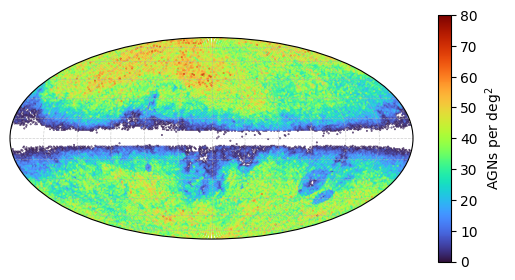

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from astropy.coordinates import SkyCoord
import astropy.units as u
import healpy as hp


nside = 64
coords = SkyCoord(ra=df_5param["ra"].values * u.deg,
                  dec=df_5param["dec"].values * u.deg,
                  frame='icrs')
gal = coords.galactic

l = gal.l
b = gal.b

nside = 64
npix = hp.nside2npix(nside)

# Convert coordinates to HEALPix pixel indices
theta = 0.5 * np.pi - b.radian  # colatitude
phi = l.radian
pix = hp.ang2pix(nside, theta, phi, nest=False)

# Count number of sources in each HEALPix pixel
counts = np.bincount(pix, minlength=npix)


theta_pix, phi_pix = hp.pix2ang(nside, np.arange(npix), nest=False)
l_pix = phi_pix - np.pi
b_pix = 0.5 * np.pi - theta_pix


mask = counts > 0
l_plot = l_pix[mask]
b_plot = b_pix[mask]
count_plot = counts[mask]

# Optional: sort so high-count pixels are drawn last
sorted_idx = np.argsort(count_plot)
l_sorted = l_plot[sorted_idx]
b_sorted = b_plot[sorted_idx]
count_sorted = count_plot[sorted_idx]



plt.figure(figsize=(6.5, 4))  
ax = plt.subplot(111, projection="mollweide")

sc = ax.scatter(l_sorted, b_sorted, 
                c=count_sorted, cmap="turbo", s=0.15, vmin=0, vmax=80)
cbar = plt.colorbar(sc, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label(r"AGNs per $\text{deg}^2$")
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
# Clean up ticks/labels
ax.set_xticklabels([])
ax.set_yticklabels([])
#plt.savefig("plots/main_plots/AGNs_per_deg_sq.png", dpi=300, bbox_inches='tight')
plt.show()

# Color choice:
# jet
# turbo


# Filtering Data
In this section we aim to remove potential outliers from the five parameter solution dataset.

## Plan 

1. Initial Least Square Fit $\rightarrow$ Fit the VSH model using all data.
2. Compute $X^2$ Values $\rightarrow$ For each QSO
3. Compute the Median $\rightarrow$ Compute the median of all $X$ values.
4. Reject Outliers $\rightarrow$ If $X>\kappa \times \text{ median}(X)$, mark the source as outlier.
5. Refit $\rightarrow$ Exclude outliers and re-run the fit.
6. Iterate $\rightarrow$ Repeate steps (e.g. 2-5) until convergence (i.e. outlier stops changing).

## Procedure In EDR3
1. Perform Least Square $\rightarrow$ estimate VSH coefficients
2. $\kappa$-Clipping $\rightarrow$ remove outliers
3. Perform Bootstrapping $\rightarrow$ quantify the uncertainty of results

## Our approach
Keep step 1 and 2 from EDR3, nut instrad:
1. Perform Least Square $+$ $\kappa$-Clipping $\rightarrow$ filter the data
2. Perform HMC (Bayesian inference) sampling on filtered dataset $\rightarrow$ achieving posterior samples, with VSH coefficient estimate and uncertainities.

In [1]:
import jax.numpy as jnp
from jax import jit, vmap
from functools import partial, lru_cache
from src.models.vsh_model import*
import pandas as pd
from iminuit import Minuit # to perform least square
from src.models.configuration import*
from src.data.data_utils import*

/root/Document/Gaia_Project/mem97/gaia_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load data
df = load_qso_dataframe()
angles, obs, error = config_data(df)

In [3]:
def robust_least_squares_fit(angles, obs, error, theta_init, lmax, t_bound, s_bound, kappa=3.0, max_iter=10):

    limits = vsh_minuit_limits(lmax=lmax, t_bound=t_bound, s_bound=s_bound)

    alpha, delta = angles
    mu_a_obs, mu_d_obs = obs
    s_mu_a, s_mu_d, rho = error

    keep = jnp.ones_like(alpha, dtype=bool)
    theta = theta_init

    prev_outliers = None

    for iteration in range(max_iter):
        alpha_k, delta_k = alpha[keep], delta[keep]
        obs_k = (mu_a_obs[keep], mu_d_obs[keep])
        err_k = (s_mu_a[keep], s_mu_d[keep], rho[keep])
        angles_k = (alpha_k, delta_k)

        def least_square_wrapper(*theta_flat):
            theta_arr = jnp.array(theta_flat)
            return least_square(angles_k, obs_k, err_k, theta_arr, lmax=lmax, grid=False)

        m = Minuit(least_square_wrapper, *theta)
        m.errordef = Minuit.LEAST_SQUARES

        for j, name in enumerate(m.parameters):
            m.limits[name] = limits[name]

        m.migrad()

        theta = jnp.array([m.values[name] for name in m.parameters])

        # Compute X^2 over full dataset (not just kept subset)
        X2 = compute_X2(alpha, delta, mu_a_obs, mu_d_obs, s_mu_a, s_mu_d, rho, theta, lmax)
        median_X = jnp.median(X2)
        keep = X2 < (kappa**2) * median_X

        if prev_outliers is not None and jnp.array_equal(keep, prev_outliers):
            print(f"Converged after {iteration+1} iterations.")
            break
        prev_outliers = keep

    return theta, keep


In [4]:
lmax = 3
total_params = count_vsh_coeffs(lmax)
theta_init = jnp.zeros(total_params)

theta, keep = robust_least_squares_fit(angles, obs, error, theta_init, lmax, 0.05, 0.05)

print(f'Length of keep array: {len(keep)}')

Converged after 4 iterations.
Length of keep array: 1215942


In [5]:
df_clean = df.loc[np.array(keep)]
angles_clean, obs_clean, error_clean = config_data(df_clean)
print(f'Number of data points excluded : {len(angles[0]) - len(angles_clean[0])}')

Number of data points excluded : 3788


In [ ]:
# Saving filtered dataset
#df_clean.to_csv('csv_files/filtered_qso_data.csv', index=False)